---
title: PA 2.1 Titanic Wrangling
author: Marvin (Wenxiang) Li
format:
    html:
        toc: true
        code-fold: true
embed-resources: true        
---

# Titanic Wrangling

In this practice activity you'll continue to work with the titanic dataset in ways that flex what you've learned about both data wrangling and data visualization.

In [79]:
# Import the titanic dataset here
import numpy as np
import pandas as pd
data_dir = "https://dlsun.github.io/pods/data/"
df_titanic = pd.read_csv(data_dir + "titanic.csv")

In [80]:
import plotnine as p9
import matplotlib.pyplot as plt

In [81]:
df_titanic.head()

,name,gender,age,class,embarked,country,ticketno,fare,survived
0,"Abbing, Mr. Anthony",male,42.0,3rd,S,United States,5547.0,7.11,0
1,"Abbott, Mr. Eugene Joseph",male,13.0,3rd,S,United States,2673.0,20.05,0
2,"Abbott, Mr. Rossmore Edward",male,16.0,3rd,S,United States,2673.0,20.05,0
3,"Abbott, Mrs. Rhoda Mary 'Rosa'",female,39.0,3rd,S,England,2673.0,20.05,1
4,"Abelseth, Miss. Karen Marie",female,16.0,3rd,S,Norway,348125.0,7.13,1


## 1. Filter the data to include passengers only. Calculate the joint distribution (cross-tab) between a passenger's class and where they embarked.

In [82]:
# check all posible values
value_counts = df_titanic['class'].value_counts()
print(value_counts)

class
3rd                 709
victualling crew    431
1st                 324
engineering crew    324
2nd                 284
restaurant staff     69
deck crew            66
Name: count, dtype: int64


In [83]:
# Filter the data to include passengers only
df_titanic_passenger = df_titanic[(df_titanic["class"] == "1st") |
 (df_titanic["class"] == "2nd") |
 (df_titanic["class"] == "3rd")
]
# check
value_counts2 = df_titanic_passenger['class'].value_counts()
print(value_counts2)

class
3rd    709
1st    324
2nd    284
Name: count, dtype: int64


In [84]:
joint_distribution = pd.crosstab(df_titanic_passenger["class"], df_titanic_passenger["embarked"],normalize=True)
joint_distribution

embarked,B,C,Q,S
class,,,,
1st,0.002278,0.108580,0.002278,0.132878
2nd,0.004556,0.019742,0.005315,0.186029
3rd,0.000000,0.077449,0.085801,0.375095


## 2. Using the joint distribution that calculated above, calculate the following:

* the conditional distribution of their class given where they embarked
* the conditional distribution of where they embarked given their class

Use the conditional distributions that you calculate to answer the following quesitons:

* What proportion of 3rd class passengers embarked at Southampton?
* What proportion of Southampton passengers were in 3rd class?

In [85]:
# the conditional distribution of their class given where they embarked
marginal_embarked = joint_distribution.sum(axis=0)
print(marginal_embarked)
conditional_class_given_emabrked = joint_distribution.div(marginal_embarked, axis = 1) # div by rows
print(conditional_class_given_emabrked)

embarked
B    0.006834
C    0.205771
Q    0.093394
S    0.694002
dtype: float64
embarked         B         C         Q         S
class                                           
1st       0.333333  0.527675  0.024390  0.191466
2nd       0.666667  0.095941  0.056911  0.268053
3rd       0.000000  0.376384  0.918699  0.540481


In [86]:
# the conditional distribution of where they embarked given their class
marginal_class = joint_distribution.sum(axis=1)
print(marginal_class)
conditional_emabraked_given_class = joint_distribution.div(marginal_class, axis = 0) # div by columns
print(conditional_emabraked_given_class)

class
1st    0.246014
2nd    0.215642
3rd    0.538345
dtype: float64
embarked         B         C         Q         S
class                                           
1st       0.009259  0.441358  0.009259  0.540123
2nd       0.021127  0.091549  0.024648  0.862676
3rd       0.000000  0.143865  0.159379  0.696756


In [87]:
# What proportion of 3rd class passengers embarked at Southampton?
conditional_class_given_emabrked.iloc[2,3].round(3)


0.54

In [88]:
# What proportion of Southampton passengers were in 3rd class?
conditional_emabraked_given_class.iloc[2,3].round(3)

0.697

## 3. Make a visualization showing the distribution of a passenger's class, given where they embarked.

Discuss the pros and cons of using this visualization versus the distributions you calculated before, to answer the previous questions.

In [90]:
type(conditional_class_given_emabrked)

pandas.core.frame.DataFrame

In [89]:
# turn the index into a column
conditional_class_given_emabrked["class"] = conditional_class_given_emabrked.index
print(conditional_class_given_emabrked)

embarked         B         C         Q         S class
class                                                 
1st       0.333333  0.527675  0.024390  0.191466   1st
2nd       0.666667  0.095941  0.056911  0.268053   2nd
3rd       0.000000  0.376384  0.918699  0.540481   3rd


In [91]:
# turn wide data to long data
df_long = conditional_class_given_emabrked.melt(id_vars=['class'], value_vars=['B', 'C', 'Q', 'S'],var_name='embarked', value_name='probability')
print(df_long)

   class embarked  probability
0    1st        B     0.333333
1    2nd        B     0.666667
2    3rd        B     0.000000
3    1st        C     0.527675
4    2nd        C     0.095941
5    3rd        C     0.376384
6    1st        Q     0.024390
7    2nd        Q     0.056911
8    3rd        Q     0.918699
9    1st        S     0.191466
10   2nd        S     0.268053
11   3rd        S     0.540481


/usr/local/lib/python3.10/dist-packages/IPython/lib/pretty.py:700: FutureWarning: Using repr(plot) to draw and show the plot figure is deprecated and will be removed in a future version. Use plot.show().


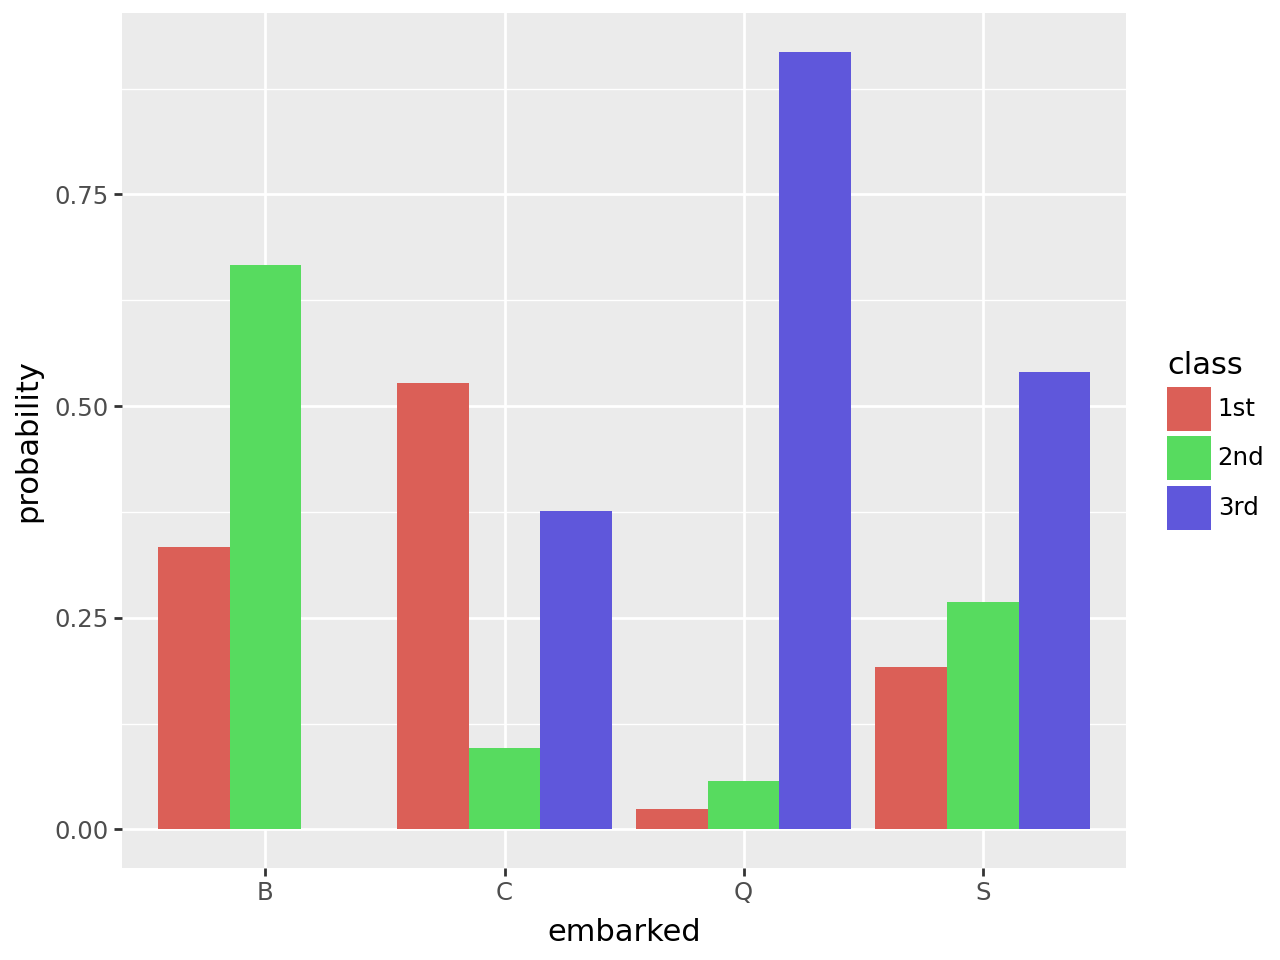

[<Figure Size: (640 x 480)>]

In [78]:
[p9.ggplot(df_long) +
 p9.aes(x="embarked",y= "probability", fill = "class") +
  p9.geom_bar(stat='identity',position= "dodge")
  ]